In [308]:
import pandas as pd

# 데이터 불러오기
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
file = pd.read_csv(url)
data = file.iloc[:,1:]
data = data.dropna()

# Sales 데이터에서 'K'와 'M'를 곱셈으로 해결
data['NA_Sales'] = data['NA_Sales'].map(lambda x : x.replace('K','*1000'))
data['NA_Sales'] = data['NA_Sales'].map(lambda x : x.replace('M','*1000000'))

data['EU_Sales'] = data['EU_Sales'].map(lambda x : x.replace('K','*1000'))
data['EU_Sales'] = data['EU_Sales'].map(lambda x : x.replace('M','*1000000'))

data['JP_Sales'] = data['JP_Sales'].map(lambda x : x.replace('K','*1000'))
data['JP_Sales'] = data['JP_Sales'].map(lambda x : x.replace('M','*1000000'))

data['Other_Sales'] = data['Other_Sales'].map(lambda x : x.replace('K','*1000'))
data['Other_Sales'] = data['Other_Sales'].map(lambda x : x.replace('M','*1000000'))

def strTofloat(obj):
  try:
    num1 = float(obj.split('*')[0])
    num2 = float(obj.split('*')[1])
    prod = num1*num2
    return prod
  except:
    return float(obj)

data['NA_Sales'] = data['NA_Sales'].apply(strTofloat)
data['EU_Sales'] = data['EU_Sales'].apply(strTofloat)
data['JP_Sales'] = data['JP_Sales'].apply(strTofloat)
data['Other_Sales'] = data['Other_Sales'].apply(strTofloat)

# Name : 게임의 이름입니다.
# Platform : 게임이 지원되는 플랫폼의 이름입니다.
# Year : 게임이 출시된 연도입니다.
# Genre : 게임의 장르입니다.
# Publisher : 게임을 제작한 회사입니다.
# NA_Sales : 북미지역에서의 출고량입니다.
# EU_Sales : 유럽지역에서의 출고량입니다.
# JP_Sales : 일본지역에서의 출고량입니다.
# Other_Sales : 기타지역에서의 출고량입니다.

In [309]:
##### Q1. 지역에 따라서 선호하는 게임 장르가 다를까 #####
import matplotlib.pyplot as plt

# 장르별 지역 매출 추출
action = data[data['Genre']=='Action']
adventure = data[data['Genre']=='Adventure']
fighting = data[data['Genre']=='Fighting']
misc = data[data['Genre']=='Misc']
platform = data[data['Genre']=='Platform']
puzzle = data[data['Genre']=='Puzzle']
racing = data[data['Genre']=='Racing']
role_playing = data[data['Genre']=='Role-Playing']
shooter = data[data['Genre']=='Shooter']
simulation = data[data['Genre']=='Simulation']
sports = data[data['Genre']=='Sports']
strategy = data[data['Genre']=='Strategy']

# 필요 항목만 추리기
action = action[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
adventure = adventure[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
fighting = fighting[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
misc = misc[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
platform = platform[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
puzzle = puzzle[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
racing = racing[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
role_playing = role_playing[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
shooter = shooter[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
simulation = simulation[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
sports = sports[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
strategy = strategy[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]

In [310]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 이상치 제거
def out_iqr(data):
  q1, q3 = np.percentile(data['NA_Sales'], [25,75])
  iqr = q3-q1
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr*1.5)
  NA_out = np.where((data['NA_Sales']>upper_bound)|(data['NA_Sales']<lower_bound))[0]

  q1, q3 = np.percentile(data['EU_Sales'], [25,75])
  iqr = q3-q1
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr*1.5)
  EU_out = np.where((data['EU_Sales']>upper_bound)|(data['EU_Sales']<lower_bound))[0]

  q1, q3 = np.percentile(data['JP_Sales'], [25,75])
  iqr = q3-q1
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr*1.5)
  JP_out = np.where((data['JP_Sales']>upper_bound)|(data['JP_Sales']<lower_bound))[0]

  q1, q3 = np.percentile(data['Other_Sales'], [25,75])
  iqr = q3-q1
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr*1.5)
  Other_out = np.where((data['Other_Sales']>upper_bound)|(data['Other_Sales']<lower_bound))[0]

  total_out_index = np.concatenate((NA_out, EU_out, JP_out, Other_out), axis=None)
  total_out_index = sorted(list(set(total_out_index)))

  return total_out_index

def out_del(data):
  out_index = out_iqr(data)
  norm_index = []
  for i in data.index:
    if i in out_index:
      continue
    else:
      norm_index.append(i)
  return data.loc[norm_index]

action_out = out_del(action)
adventure_out = out_del(adventure)
fighting_out = out_del(fighting)
misc_out = out_del(misc)
platform_out = out_del(platform)
puzzle_out = out_del(puzzle)
racing_out = out_del(racing)
role_playing_out = out_del(role_playing)
shooter_out = out_del(shooter)
simulation_out = out_del(simulation)
sports_out = out_del(sports)
strategy_out = out_del(strategy)

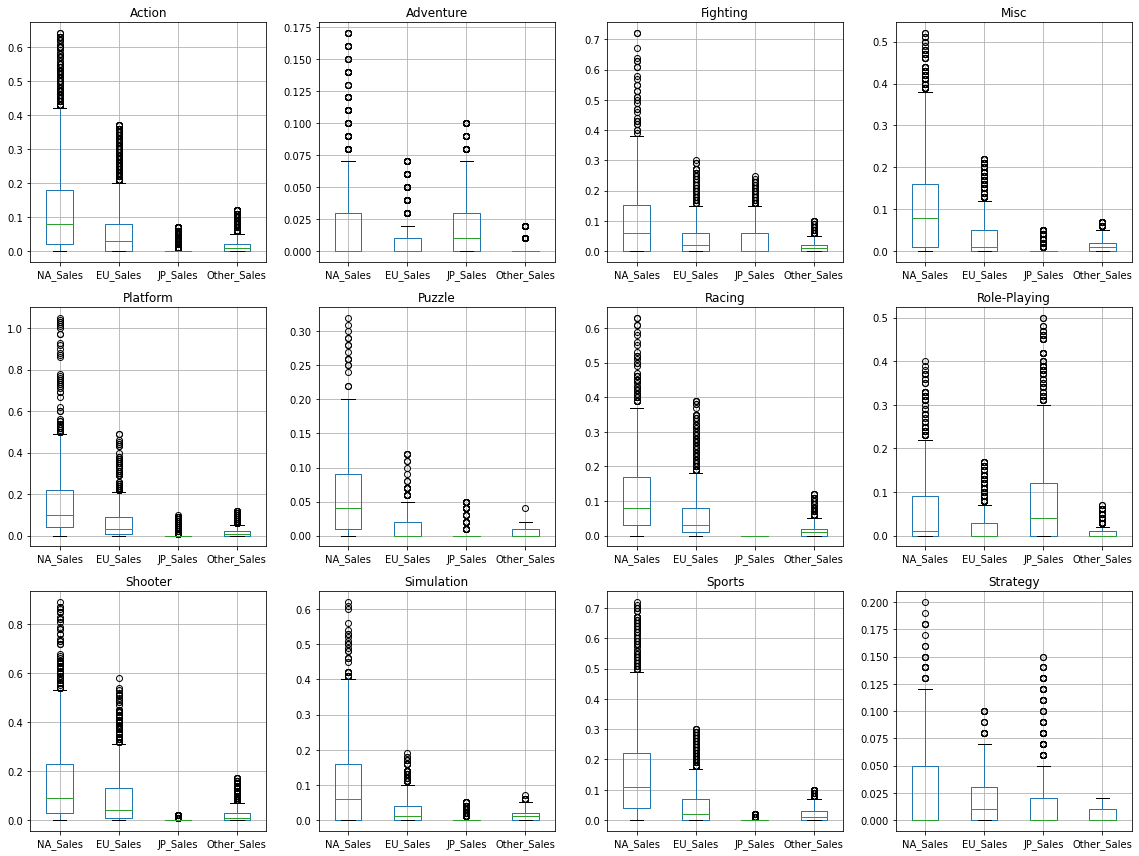

In [311]:
# Boxplot으로 시각화
fig = plt.figure(figsize=(16,12))

ax1 = plt.subplot(3,4,1)
action_out.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Action")

ax2 = plt.subplot(3,4,2)
adventure_out.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Adventure")

ax3 = plt.subplot(3,4,3)
fighting_out.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Fighting")

ax4 = plt.subplot(3,4,4)
misc_out.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Misc")

ax5 = plt.subplot(3,4,5)
platform_out.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Platform")

ax6 = plt.subplot(3,4,6)
puzzle_out.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Puzzle")

ax7 = plt.subplot(3,4,7)
racing_out.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Racing")

ax8 = plt.subplot(3,4,8)
role_playing_out.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Role-Playing")

ax9 = plt.subplot(3,4,9)
shooter_out.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Shooter")

ax10 = plt.subplot(3,4,10)
simulation_out.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Simulation")

ax11 = plt.subplot(3,4,11)
sports_out.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Sports")

ax12 = plt.subplot(3,4,12)
strategy_out.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Strategy")

plt.tight_layout()
plt.show()

In [312]:
from scipy.stats import f_oneway

# ANOVA 분석
def anova(data):
  return f_oneway(data['NA_Sales'], data['EU_Sales'], data['JP_Sales'], data['Other_Sales'])

action_anova = anova(action_out)
adventure_anova = anova(adventure_out)
fighting_anova = anova(fighting_out)
misc_anova = anova(misc_out)
platform_anova = anova(platform_out)
puzzle_anova = anova(puzzle_out)
racing_anova = anova(racing_out)
role_playing_anova = anova(role_playing_out)
shooter_anova = anova(shooter_out)
simulation_anova = anova(simulation_out)
sports_anova = anova(sports_out)
strategy_anova = anova(strategy_out)

print("Action 장르의 p-value : ", action_anova[1])
print("Adventure 장르의 p-value : ", adventure_anova[1])
print("Fighting 장르의 p-value : ", fighting_anova[1])
print("Misc 장르의 p-value : ", misc_anova[1])
print("Platform 장르의 p-value : ", platform_anova[1])
print("Puzzle 장르의 p-value : ", puzzle_anova[1])
print("Racing 장르의 p-value : ", racing_anova[1])
print("Role-Plyaing 장르의 p-value : ", role_playing_anova[1])
print("Shooter 장르의 p-value : ", shooter_anova[1])
print("Simulation 장르의 p-value : ", simulation_anova[1])
print('Sports 장르의 p-value : ', sports_anova[1])
print("Strategy 장르의 p-value : ", strategy_anova[1])

Action 장르의 p-value :  0.0
Adventure 장르의 p-value :  7.020336585310372e-82
Fighting 장르의 p-value :  4.775474366770211e-86
Misc 장르의 p-value :  0.0
Platform 장르의 p-value :  2.8204922794783746e-152
Puzzle 장르의 p-value :  1.6112012975417706e-117
Racing 장르의 p-value :  1.2178163366371733e-245
Role-Plyaing 장르의 p-value :  3.3755916101061385e-144
Shooter 장르의 p-value :  2.6289049966636196e-220
Simulation 장르의 p-value :  1.842149533653971e-154
Sports 장르의 p-value :  0.0
Strategy 장르의 p-value :  8.106739387353028e-26


In [313]:
# 북미가 구매하는 절대량이 맣기 때문에 장르별 선호도가 드러나지 않는다.
# 이를 해결하기 위해 지역별 전체 구매량으로 나누어 비율자료를 활용한다.

NA_total = data['NA_Sales'].sum()
EU_total = data['EU_Sales'].sum()
JP_total = data['JP_Sales'].sum()
Other_total = data['Other_Sales'].sum()

data_per = data

def NA_per(data):
  return data/NA_total
def EU_per(data):
  return data/EU_total
def JP_per(data):
  return data/JP_total
def Other_per(data):
  return data/Other_total

data_per['NA_Sales'] = data_per['NA_Sales'].apply(NA_per)
data_per['EU_Sales'] = data_per['EU_Sales'].apply(EU_per)
data_per['JP_Sales'] = data_per['JP_Sales'].apply(JP_per)
data_per['Other_Sales'] = data_per['Other_Sales'].apply(Other_per)

# 장르별 지역 매출 추출
action_per = data_per[data_per['Genre']=='Action']
adventure_per = data_per[data_per['Genre']=='Adventure']
fighting_per = data_per[data_per['Genre']=='Fighting']
misc_per = data_per[data_per['Genre']=='Misc']
platform_per = data_per[data_per['Genre']=='Platform']
puzzle_per = data_per[data_per['Genre']=='Puzzle']
racing_per = data_per[data_per['Genre']=='Racing']
role_playing_per = data_per[data_per['Genre']=='Role-Playing']
shooter_per = data_per[data_per['Genre']=='Shooter']
simulation_per = data_per[data_per['Genre']=='Simulation']
sports_per = data_per[data_per['Genre']=='Sports']
strategy_per = data_per[data_per['Genre']=='Strategy']

# 필요 항목만 추리기
action_per = action_per[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
adventure_per = adventure_per[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
fighting_per = fighting_per[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
misc_per = misc_per[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
platform_per = platform_per[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
puzzle_per = puzzle_per[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
racing_per = racing_per[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
role_playing_per = role_playing_per[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
shooter_per = shooter_per[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
simulation_per = simulation_per[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
sports_per = sports_per[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]
strategy_per = strategy_per[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index().iloc[:,1:]

In [314]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 이상치 제거
action_out_per = out_del(action_per)
adventure_out_per = out_del(adventure_per)
fighting_out_per = out_del(fighting_per)
misc_out_per = out_del(misc_per)
platform_out_per = out_del(platform_per)
puzzle_out_per = out_del(puzzle_per)
racing_out_per = out_del(racing_per)
role_playing_out_per = out_del(role_playing_per)
shooter_out_per = out_del(shooter_per)
simulation_out_per = out_del(simulation_per)
sports_out_per = out_del(sports_per)
strategy_out_per = out_del(strategy_per)

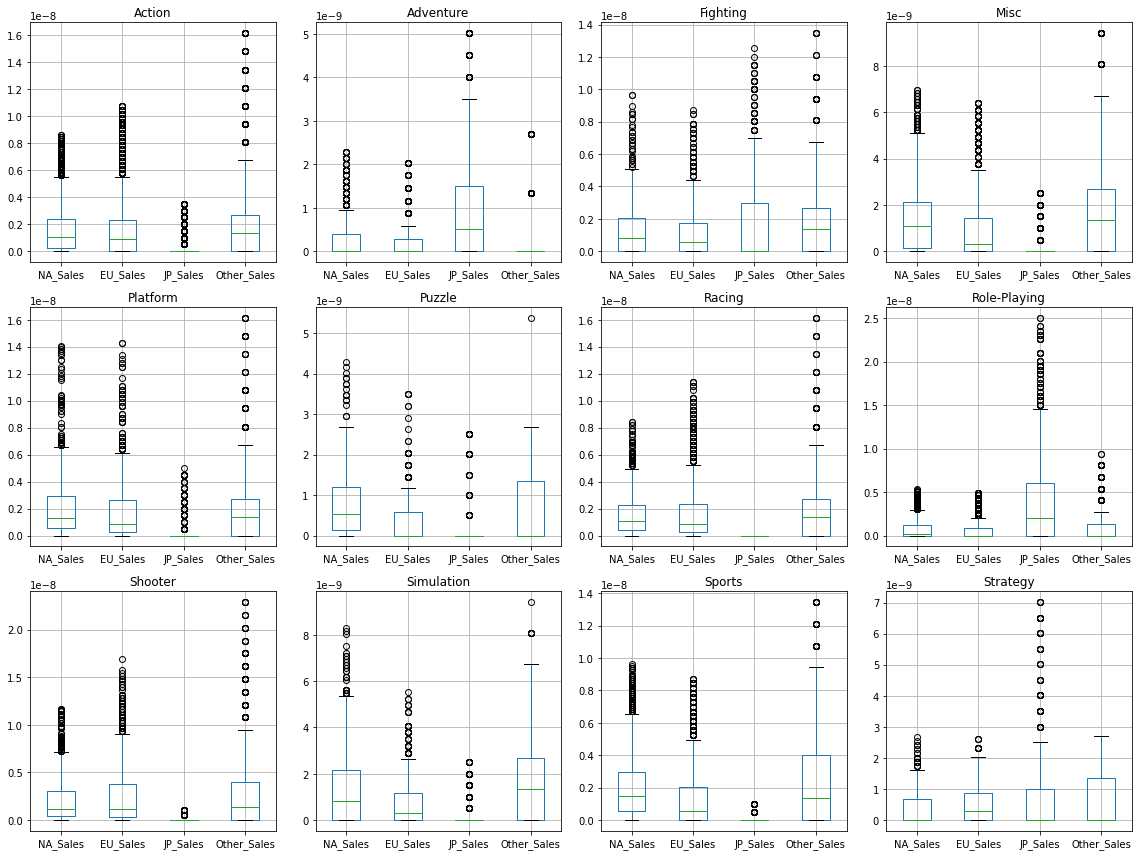

In [315]:
# Boxplot으로 시각화
fig = plt.figure(figsize=(16,12))

ax1 = plt.subplot(3,4,1)
action_out_per.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Action")

ax2 = plt.subplot(3,4,2)
adventure_out_per.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Adventure")

ax3 = plt.subplot(3,4,3)
fighting_out_per.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Fighting")

ax4 = plt.subplot(3,4,4)
misc_out_per.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Misc")

ax5 = plt.subplot(3,4,5)
platform_out_per.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Platform")

ax6 = plt.subplot(3,4,6)
puzzle_out_per.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Puzzle")

ax7 = plt.subplot(3,4,7)
racing_out_per.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Racing")

ax8 = plt.subplot(3,4,8)
role_playing_out_per.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Role-Playing")

ax9 = plt.subplot(3,4,9)
shooter_out_per.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Shooter")

ax10 = plt.subplot(3,4,10)
simulation_out_per.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Simulation")

ax11 = plt.subplot(3,4,11)
sports_out_per.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Sports")

ax12 = plt.subplot(3,4,12)
strategy_out_per.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title("Strategy")

plt.tight_layout()
plt.show()

In [316]:
from scipy.stats import f_oneway

# ANOVA 분석
action_per_anova = anova(action_out_per)
adventure_per_anova = anova(adventure_out_per)
fighting_per_anova = anova(fighting_out_per)
misc_per_anova = anova(misc_out_per)
platform_per_anova = anova(platform_out_per)
puzzle_per_anova = anova(puzzle_out_per)
racing_per_anova = anova(racing_out_per)
role_playing_per_anova = anova(role_playing_out_per)
shooter_per_anova = anova(shooter_out_per)
simulation_per_anova = anova(simulation_out_per)
sports_per_anova = anova(sports_out_per)
strategy_per_anova = anova(strategy_out_per)

print("Action 장르의 p-value : ", action_per_anova[1])
print("Adventure 장르의 p-value : ", adventure_per_anova[1])
print("Fighting 장르의 p-value : ", fighting_per_anova[1])
print("Misc 장르의 p-value : ", misc_per_anova[1])
print("Platform 장르의 p-value : ", platform_per_anova[1])
print("Puzzle 장르의 p-value : ", puzzle_per_anova[1])
print("Racing 장르의 p-value : ", racing_per_anova[1])
print("Role-Plyaing 장르의 p-value : ", role_playing_per_anova[1])
print("Shooter 장르의 p-value : ", shooter_per_anova[1])
print("Simulation 장르의 p-value : ", simulation_per_anova[1])
print('Sports 장르의 p-value : ', sports_per_anova[1])
print("Strategy 장르의 p-value : ", strategy_per_anova[1])

Action 장르의 p-value :  1.5625116484496673e-212
Adventure 장르의 p-value :  7.382571490239951e-132
Fighting 장르의 p-value :  6.079517805661549e-08
Misc 장르의 p-value :  2.627225087384031e-113
Platform 장르의 p-value :  6.153498994778809e-56
Puzzle 장르의 p-value :  9.370011795158665e-34
Racing 장르의 p-value :  1.3048525033235367e-114
Role-Plyaing 장르의 p-value :  4.421501118082594e-197
Shooter 장르의 p-value :  8.807030002776016e-115
Simulation 장르의 p-value :  2.803541747771625e-66
Sports 장르의 p-value :  1.9785436033906122e-244
Strategy 장르의 p-value :  1.9458308300754465e-14
